In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from scipy.spatial.distance import cdist

In [8]:
all_dists = {}
mean_dists = {}
knn_dists = {}
all_gaussians = {}
all_centroids = {}
dims = [2, 3, 10, 20, 50, 100]#, 200, 1000]

for d in dims:
    #n, d = 1000, 200
    n = 5000
    n_cent = 10

    X = (1 / np.sqrt(d)) * np.random.randn(n, d)
    centroids = (1 / np.sqrt(d)) * np.random.randn(n_cent, d)
    
    dist_X = cdist(X, X)
    knn_dists[d] = np.min(dist_X + 100*np.eye(X.shape[0]), axis=1)
    mean_dists[d] = np.mean(dist_X, axis=1)

    epochs = 20
    for epoch in range(epochs):
        distances = cdist(X, centroids)

        #print(f"Current loss: {np.mean(np.min(distances, axis=1))}")
        assignments = np.argmin(distances, axis=1)

        for i in range(n_cent):
            centroids[i] = np.mean(X[assignments == i], axis=0)
            
    all_dists[d] = np.min(distances, axis=1)
    all_gaussians[d] = X
    all_centroids[d] = centroids


In [9]:
if False:
    _ = plt.hist([knn_dists[d] for d in dims[::-1]], bins=np.linspace(0, 1.5, num=100), label=["dim=%d" % x for x in dims[::-1]], histtype='stepfilled', alpha=0.7)
    plt.legend()
    plt.title("Distance to the nearest neighbor")

In [10]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

/Users/asablayrolles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


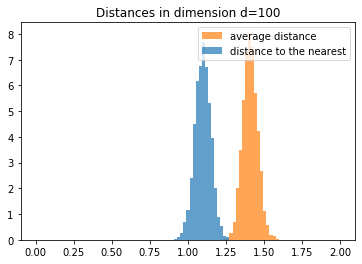

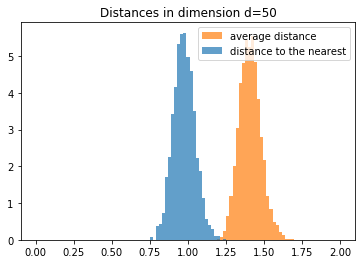

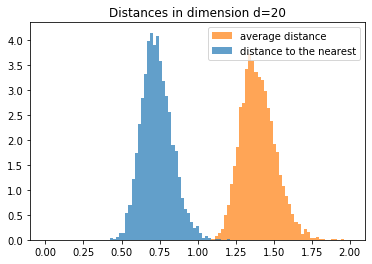

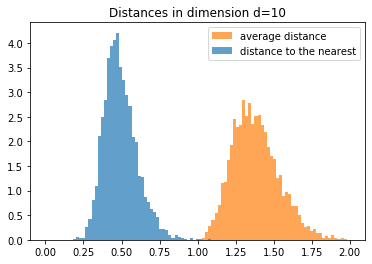

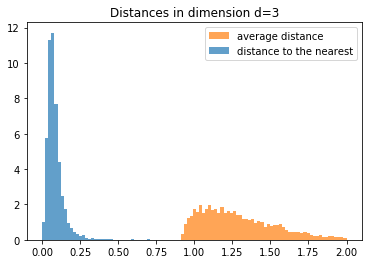

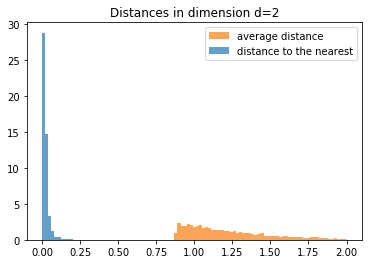

In [12]:
for d in dims[::-1]:
    _ = plt.hist([knn_dists[d], mean_dists[d]], bins=np.linspace(0, 2, num=100), label=["distance to the nearest", "average distance"], histtype='stepfilled', alpha=0.7, normed=True)
    plt.legend()
    plt.title("Distances in dimension d=%d" % d)
    plt.savefig("dim=%d.png" % d)
    plt.show()

In [63]:
import matplotlib.lines as mlines


def newline(p1, p2):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l

In [ ]:
import numpy as np
from matplotlib import collections  as mc

lines = [[(0, 1), (1, 1)], [(2, 3), (3, 3)], [(1, 2), (1, 3)]]
c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])

lc = mc.LineCollection(lines, colors=c, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)

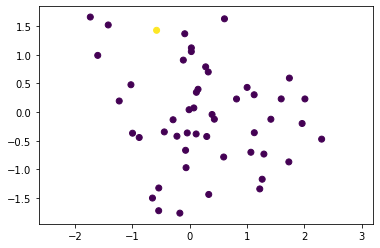

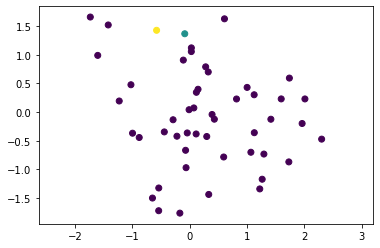

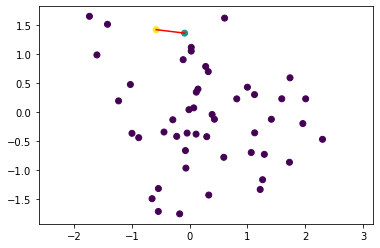

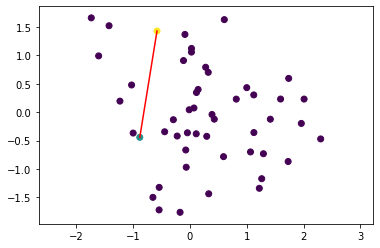

In [78]:
np.random.seed(0)
n_points = 50

i = np.random.choice(n_points)
X = np.random.randn(n_points, 2)
j_random = np.random.choice(n_points)

j_nn = np.argmin(np.linalg.norm(X - X[i:i+1], axis=1) + 50 * (np.arange(n_points) == i))


# Only youuuuuu
c = np.zeros((n_points), dtype=int)
c[i] = 2

plt.scatter(X[:, 0], X[:, 1], c=c)
plt.axis("equal")
plt.savefig("singlepoint.png")
plt.show()

# Only you + NN
c = np.zeros((n_points), dtype=int)
c[i] = 2
c[j_nn] = 1

plt.scatter(X[:, 0], X[:, 1], c=c)
plt.axis("equal")
plt.savefig("point_nn.png")
plt.show()

# NN + neighbor
c = np.zeros((n_points), dtype=int)
c[i] = 2
c[j_nn] = 1

plt.plot(X[[i, j_nn], 0], X[[i, j_nn], 1], c="red")
plt.scatter(X[:, 0], X[:, 1], c=c)
plt.axis("equal")
plt.savefig("point_nn_line.png")
plt.show()


# Random neighbor
c = np.zeros((n_points), dtype=int)
c[i] = 2
c[j_random] = 1

plt.plot(X[[i, j_random], 0], X[[i, j_random], 1], c="red")
plt.scatter(X[:, 0], X[:, 1], c=c)
plt.axis("equal")
plt.savefig("point_random_line.png")
plt.show()